In [1]:
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


from scipy.stats import ttest_rel, wilcoxon
from statsmodels.stats.multitest import multipletests


from pinkrigs_tools.dataset.query import load_data
from utils import format_session
from classes import session_data, exp_data

# Load & Format Data

In [2]:
# runs only when pandas==1.3.5 - run !pip install pandas==1.3.5
recordings = load_data(subject = 'AV043',
					   expDate = '2024-03-14:2024-03-20', # 2024-03-14 or 2024-03-20 
					   expDef = 'multiSpaceWorld_checker_training',
					   data_name_dict= 'all-default')


formatted_events, formatted_cluster_data, spikes, dominant_modality, session_no, session_date = format_session(recordings, 
																								 session_no = 1, 
																								 expDef = 'multiSpaceWorld_checker_training', 
																								 check_dominantModality=True)

/Users/Serkan/opt/anaconda3/envs/pink_rigs/lib/python3.10/site-packages/floras_helpers/hist/regions.py:430: RuntimeWarning: invalid value encountered in cast
  level=df_regions.depth.to_numpy().astype(np.uint16),
/Users/Serkan/opt/anaconda3/envs/pink_rigs/lib/python3.10/site-packages/floras_helpers/hist/regions.py:432: RuntimeWarning: invalid value encountered in cast
  order=df_regions.graph_order.to_numpy().astype(np.uint16))
/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/pinkrigs_tools/utils/spk_utils.py:172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clusInfo.brainLocationAcronyms_ccf_2017[


# Creating Objects

In [3]:
data = exp_data()
for i in range(len(recordings)):
	data.add_session(session_data(*format_session(recordings, 
												 session_no = i, 
												 expDef = 'multiSpaceWorld_checker_training', 
												 check_dominantModality=True)),
					 baseline_start = -0.5, stimulus_end = 0.5, bin_size = 0.01)

/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/classes.py:191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['vis_loc'] = np.select(vis_conditions, vis_choices, default='o')
/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/classes.py:192: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trials['aud_loc'] = np.select(aud_conditions, aud_choices, default='c')


# Simple Visualisation

## PSTH of a session

### All stimuli

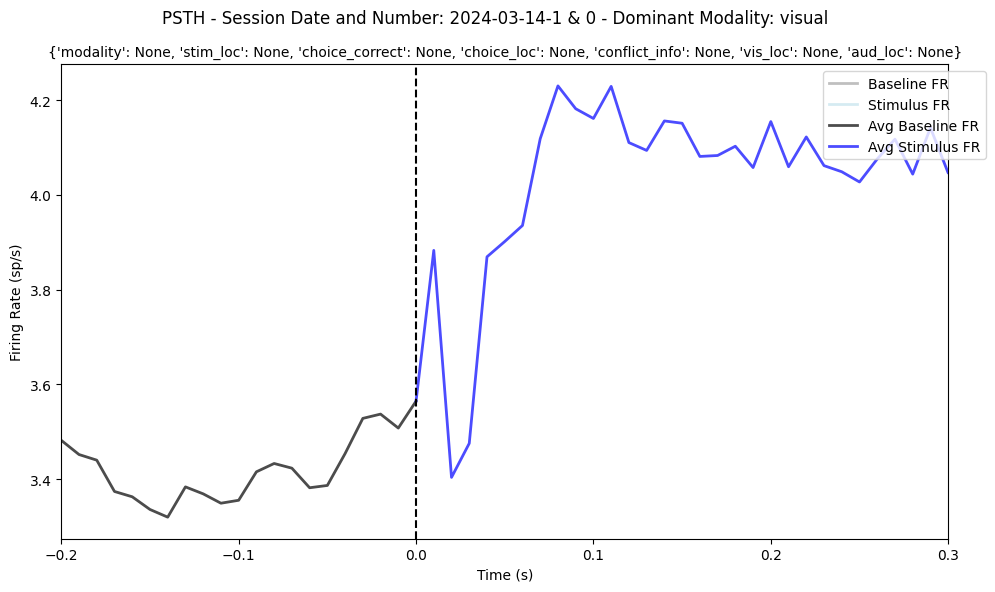

In [4]:
obj = data.session_data_obj[0]
obj.return_mask()
obj.plot_psth(color_based_on = None,
              xlim=(-0.2, 0.3),
              only_average = True) # mean firing rate of neuron X over all trials

### Per stimulus

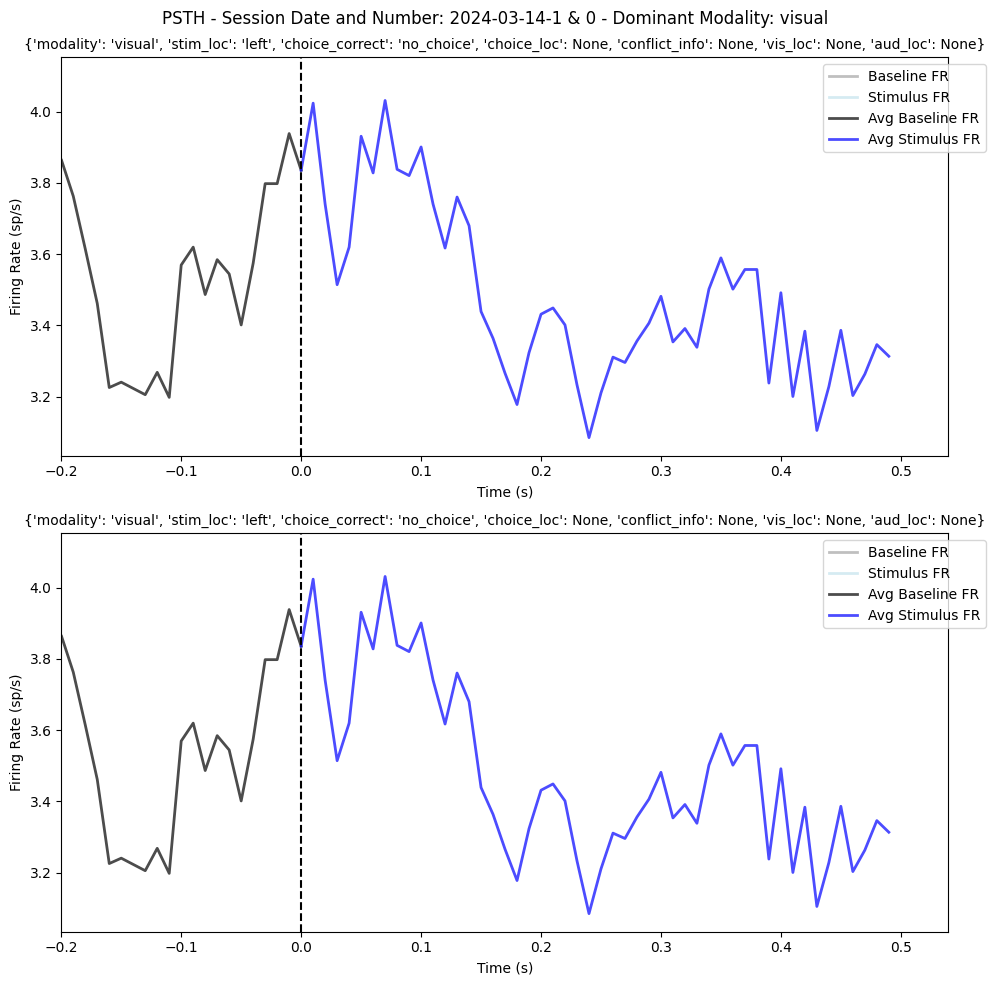

In [5]:
obj.return_mask(stim_loc= 'left', modality = 'visual', choice_correct= 'no_choice')

obj.plot_psth(figsize = (10, 10),
			  xlim = (-0.2, None),
			  ylim = (None, None),
			  filter_info = [{'modality': 'visual',
							 'stim_loc': 'left',
							 'choice_correct': None,
							 'choice_loc': None,
							 'conflict_info': None
							 },
							 {'modality': 'conflict',
							 'stim_loc': 'left',
							 'choice_correct': 'c',
							 'choice_loc': None,
							 'conflict_info': None
							 },
							 ],
			  color_based_on = None,
			  only_average = True
			  ) # mean firing rate of neuron X over all trials


## Raster Plot of a neuron across trials

### All stimuli

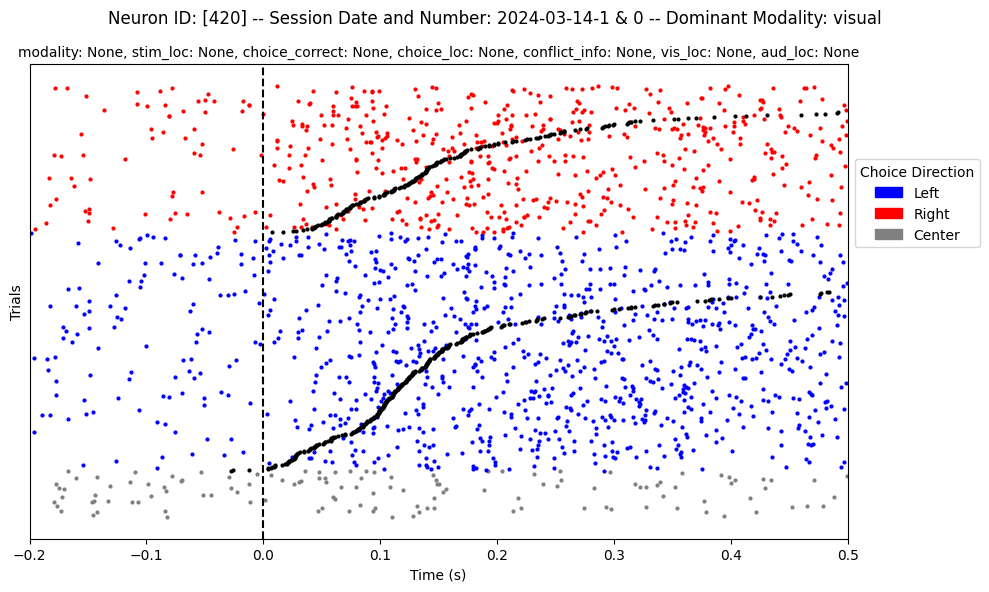

In [6]:
obj.return_mask()
obj.plot_spike_raster(neuron_ids = [420], first_move = False,
					  sort_choice_loc = True, sort_response_time = True)

### Per stimulus

/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/classes.py:667: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[1, 0, 1, 0.95])


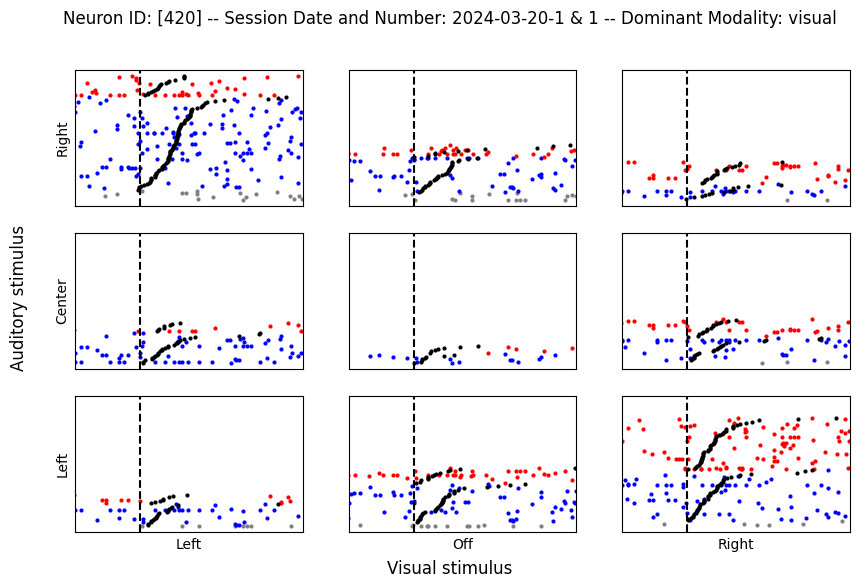

In [7]:
obj = data.session_data_obj[1]
obj.plot_spike_raster_table(neuron_ids = 420, first_move = True, sort_choice_loc = True, sort_response_time = True)

## Significant firing rate change in respond to stimulus

### All stimuli - population

#### Apply significance test

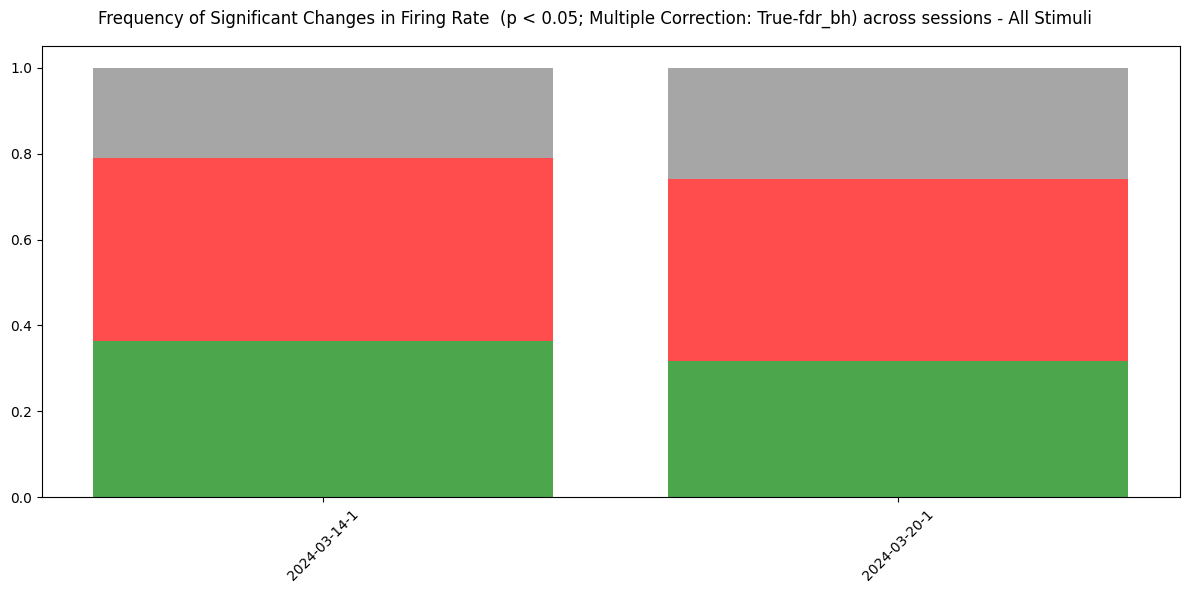

In [8]:
parametric_test = True
one_sided = True
multiple_correction = True

mc_test = 'fdr_bh' # 'bonferroni', 'sidak', 'holm', 'fdr_bh'
mc_alpha = 0.05

data.test_firing_rate_change_stimulus_sessions(parametric_test = parametric_test,
											   one_sided = one_sided,
											   multiple_correction = multiple_correction,
											   mc_test = mc_test, mc_alpha = mc_alpha)

### Per stimulus - population

plot: response to all; response to 9 (like the one before)

/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/utils_class.py:155: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_val = ttest_rel(baseline_rate, stimulus_rate, alternative='less')
/Users/Serkan/Desktop/academia/PhD/rotations/cortex_lab/project/utils_class.py:152: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p_val = ttest_rel(baseline_rate, stimulus_rate, alternative='greater')


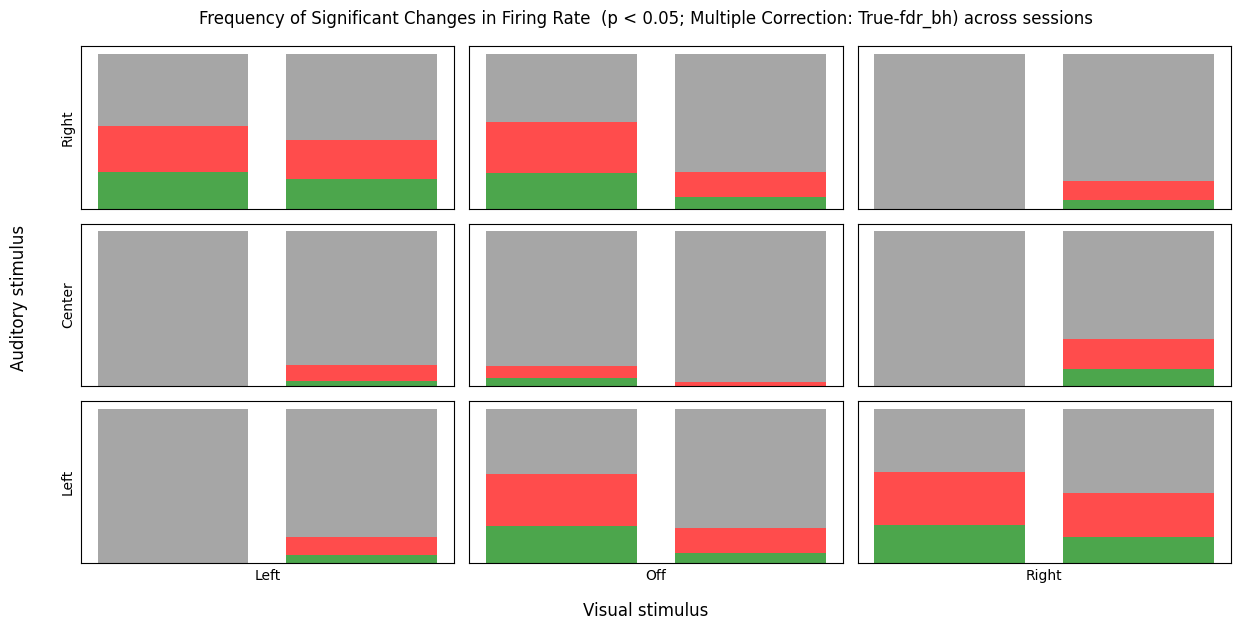

In [9]:
parametric_test = True
one_sided = True
multiple_correction = True
mc_test= 'fdr_bh'
mc_alpha = 0.05
plot = True
masks = [{'aud_loc': 'r', 'vis_loc': 'l'},
		{'aud_loc': 'c', 'vis_loc': 'l'},
		{'aud_loc': 'l', 'vis_loc': 'l'},
		{'aud_loc': 'r', 'vis_loc': 'o'},
		{'aud_loc': 'c', 'vis_loc': 'o'},
		{'aud_loc': 'l', 'vis_loc': 'o'},
		{'aud_loc': 'r', 'vis_loc': 'r'},
		{'aud_loc': 'c', 'vis_loc': 'r'},
		{'aud_loc': 'l', 'vis_loc': 'r'}]

data.test_firing_rate_change_stimulus_sessions(parametric_test = parametric_test,
											   one_sided = one_sided,
											   multiple_correction = multiple_correction,
											   mc_test = mc_test, mc_alpha = mc_alpha, masks = masks)

# find important neurons

In [17]:
variance_ratio, increased_neurons, decreased_neurons = obj.find_significant_neurons(method = 'ttest')

# pca

In [35]:
increased = True
if increased is None:
    neurons_of_interest = increased_neurons + decreased_neurons
elif increased:
    neurons_of_interest = increased_neurons
else:
    neurons_of_interest = decreased_neurons
neurons_of_interest = np.sort(np.array(neurons_of_interest))

In [52]:
# Convert lists to matrices
baseline_data = obj.formatted_data_array['firing_rate']['baseline']  # Neurons x Trials x Time
stimulus_data = obj.formatted_data_array['firing_rate']['stimulus'] # Neurons x Trials x Time

# Reshape into (Trials x Neurons x Time)
baseline_data = np.swapaxes(baseline_data, 0, 1)
stimulus_data = np.swapaxes(stimulus_data, 0, 1)

# Average firing rates across trials
baseline_avg = np.mean(baseline_data, axis=0)  # Neurons x Time
stimulus_avg = np.mean(stimulus_data, axis=0)  # Neurons x Time

# Combine baseline and stimulus data
combined_data = np.hstack([baseline_avg, stimulus_avg])  # Neurons x (Baseline_Time + Stimulus_Time)


In [53]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(combined_data.T)  # Transpose for (Samples x Features)

# Split back into baseline and stimulus
baseline_reduced = reduced_data[:baseline_avg.shape[1], :]  # First Baseline_Time points
stimulus_reduced = reduced_data[baseline_avg.shape[1]-1:, :]  # Remaining Stimulus_Time points


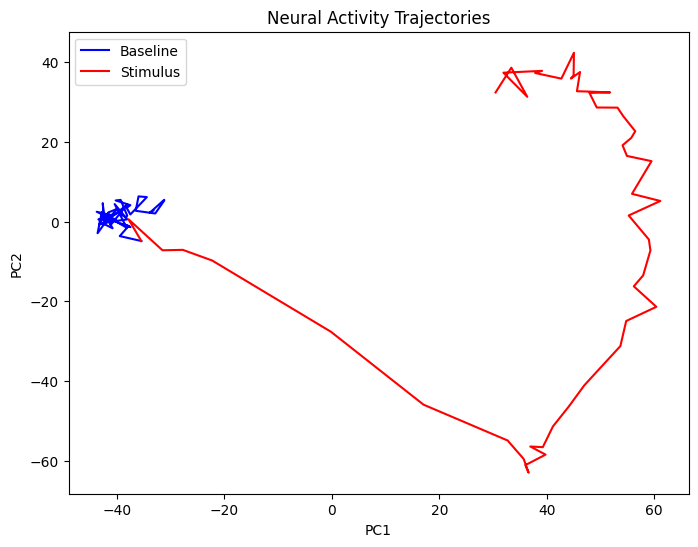

In [54]:
# Plot the first 2 PCA components
plt.figure(figsize=(8, 6))
plt.plot(baseline_reduced[:, 0], baseline_reduced[:, 1], label='Baseline', color='blue')
plt.plot(stimulus_reduced[:, 0], stimulus_reduced[:, 1], label='Stimulus', color='red')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.title('Neural Activity Trajectories')
plt.legend()
plt.show()


In [48]:
baseline_mean = np.mean(baseline_reduced, axis=0)
stimulus_mean = np.mean(stimulus_reduced, axis=0)
state_distance = np.linalg.norm(baseline_mean - stimulus_mean)
print(f"Distance between baseline and stimulus states: {state_distance}")


Distance between baseline and stimulus states: 77.57725129047414


In [49]:
baseline_velocity = np.linalg.norm(np.diff(baseline_reduced, axis=0), axis=1)
stimulus_velocity = np.linalg.norm(np.diff(stimulus_reduced, axis=0), axis=1)
print(f"Average baseline velocity: {np.mean(baseline_velocity)}")
print(f"Average stimulus velocity: {np.mean(stimulus_velocity)}")

Average baseline velocity: 3.603444088298609
Average stimulus velocity: 7.4374191245480645


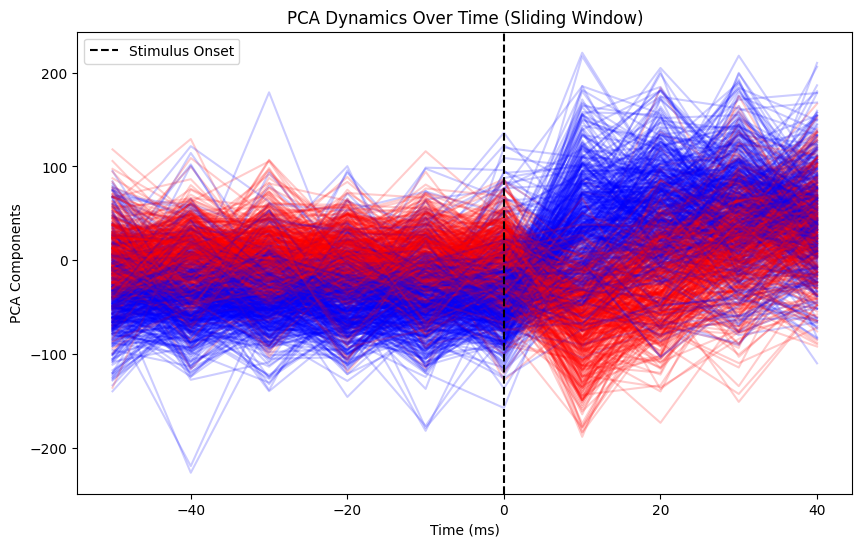

In [64]:
# Define parameters
window_size = 10  # Time window in ms (adjust to your data's time scale)
step_size = 10     # Step size in ms (adjust as needed)
sampling_rate = 1000  # In Hz (1 ms per sample, adjust as per your data)

# Convert window size and step size to number of time steps
window_size_steps = int(window_size * sampling_rate / 10000)  # Convert ms to time steps
step_size_steps = int(step_size * sampling_rate / 1000)  # Convert ms to time steps

# Get the number of neurons and time points (baseline and stimulus)
num_neurons = baseline_data.shape[0]
num_timepoints_baseline = baseline_data.shape[2]
num_timepoints_stimulus = stimulus_data.shape[2]

# Concatenate baseline and stimulus data (trials x neurons x time)
combined_data = np.concatenate([baseline_data, stimulus_data], axis=2)  # Trials x Neurons x Total_Time

# # Initialize PCA model
# pca = PCA(n_components=2)  # You can adjust the number of components

# Initialize lists to store the PCA projections
pca_projections = []

# Loop over the data with the sliding window
for start in range(0, num_timepoints_baseline + num_timepoints_stimulus - window_size_steps, step_size_steps):
    # Define the end of the window
    end = start + window_size_steps
    
    # Extract the window data (trials x neurons x time)
    window_data = combined_data[:, :, start:end]  # Trials x Neurons x Window_Size
    
    # Reshape the window data to (Trials x (Neurons * Time)) for PCA
    window_data_flat = window_data.reshape(window_data.shape[0], -1)  # Trials x (Neurons * Time)
    
    # Perform PCA on the windowed data
    window_pca = pca.transform(window_data_flat)  # Trials x PCA_Components
    
    # Store the PCA projections for this window
    pca_projections.append(window_pca)

# Convert the list of projections into a numpy array for easy access
pca_projections = np.array(pca_projections)  # Windows x Trials x PCA_Components


# Visualize the first two PCA components over time
plt.figure(figsize=(10, 6))

# Plot individual trial projections (using lighter colors)
for i in range(pca_projections.shape[1]):  # Loop over trials
    plt.plot(np.arange(pca_projections.shape[0]) * step_size - 50, pca_projections[:, i, 0], 
             color='blue', alpha=0.2)  # PC1 for individual trials
    plt.plot(np.arange(pca_projections.shape[0]) * step_size - 50, pca_projections[:, i, 1], 
             color='red', alpha=0.2)  # PC2 for individual trials

plt.axvline(x=0, color='black', linestyle='--', label='Stimulus Onset')
# Add labels and title
plt.xlabel('Time (ms)')
plt.ylabel('PCA Components')
plt.title('PCA Dynamics Over Time (Sliding Window)')
plt.legend()
plt.show()

# TBD

In [25]:
# average firing rate across neurons

In [26]:
# dimension reduction - which neurons increase/decrease together 
# or at least find the ones that increase activity for a specific stimulus

# is it the case for all stimuli or only for some stimuli
# are there any specific neurons that are always increasing/decreasing together
# are there any specific stimuli that are always increasing/decreasing together


In [27]:
# firing rate variabili

In [28]:
# firing rate across different stimulus intensities
# correlation bw neuron firing rate changes and stimulus intensity

In [29]:
# Correlation Between Neurons

In [30]:
# Latency of Neuronal Response